# **Binary Classification Using TensorFlow**

This notebook demonstrates the use of TensorFlow for a typical classification task. For the data, we'll use Scikit-Learn's built-in breast cancer dataset. 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# Load the data 
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
# We can put the data into a pandas dataframe to better view it visually
import pandas as pd 
df = pd.DataFrame(data = data.data,
                  columns = data.feature_names)
df["target"] = data.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# our data is a bunch object
type(data)

sklearn.utils._bunch.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
# We can see our data'a shape
data.data.shape

(569, 30)

In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
data.target_names
# 0 = malignant 1 = benign

array(['malignant', 'benign'], dtype='<U9')

In [12]:
# Data consists of 2D array of numbers
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
# Split the data into training and test sections 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33
)

In [15]:
# N = Number of samples D = Number of features
N, D = X_train.shape

In [16]:
N, D

(381, 30)

Feature scaling is a preprocessing step in machine learning that makes sure that all features have similar scales, which prevents certain features from dominating others during training.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We fit and transform the training data because we want to learn variance and std of the trainig set
X_train = scaler.fit_transform(X_train)
# We only transform the test set bc we want to make predictions with what we've learned with the training data
X_test = scaler.transform(X_test)

In [18]:
# Create a model with single dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), # We don't use N, because it can be any arbitrary number
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [19]:
# Evaluation metric will be accuracy
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
# We'll set number of epochs to 100
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 0.5501 - accuracy: 0.7612 - val_loss: 0.4738 - val_accuracy: 0.8032
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5039 - accuracy: 0.8031 - val_loss: 0.4327 - val_accuracy: 0.8245
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 0.4642 - accuracy: 0.8373 - val_loss: 0.3985 - val_accuracy: 0.8617
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 0.4316 - accuracy: 0.8609 - val_loss: 0.3693 - val_accuracy: 0.8883
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 0.4020 - accuracy: 0.8740 - val_loss: 0.3454 - val_accuracy: 0.9043
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.3785 - accuracy: 0.8845 - val_loss: 0.3249 - val_accuracy: 0.9149
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3574 - accuracy: 0.9003 - val_loss: 0.3068 - val_accuracy: 0.9255
Epoch 8/

In [21]:
# Returns two metrics loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.9764
Train score: [0.09699438512325287, 0.9763779640197754]
6/6 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9894
Test score: [0.08715589344501495, 0.9893617033958435]


Loss value indicates how well the model is fitting the training data, hence the lower values indicating better fit. Accuracy represents the percentage of correctly predicted labels on the training set.

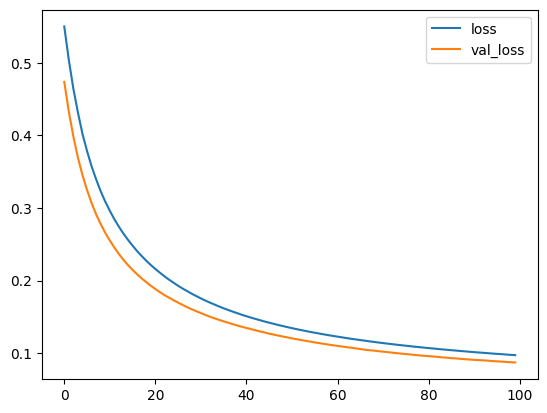

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

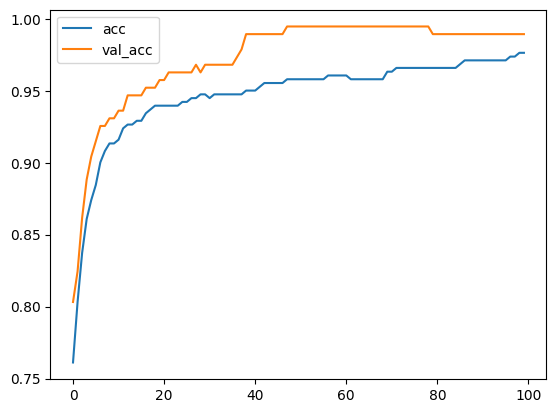

In [23]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend();

#**Making Predictions**

The sigmoid function, (also known as the logistic function), is a common activation function used in binary classification problems. It maps any real-valued number to a value between 0 and 1.

In [24]:
# Make predictions 
P = model.predict(X_test)
print(P[:5]) # They are outputs of the sigmoid, interpreted as probabilities P(y = 1 | X)

6/6 [==============================] - 0s 3ms/step
[[0.28828093]
 [0.9776831 ]
 [0.9759874 ]
 [0.99761474]
 [0.38184303]]


In [25]:
# Round to get the actual predictions 
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]


In [26]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9894
Evaluate output [0.08715589344501495, 0.9893617033958435]


# **Part 3: Saving and Loading a Model**

In [27]:
# Save the model to a file
model.save("linearclassifier.h5")
# You can see the model file from the files section

In [28]:
# Check that the model exist
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Jun  5 11:30 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jun  1 22:51 sample_data


In [29]:
# Let's load the model and confirm that it still works
model = tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 10ms/step - loss: 0.0872 - accuracy: 0.9894


[0.08715589344501495, 0.9893617033958435]